In [2]:
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from webull import webull
import numpy as np
import option_util

wb=webull()

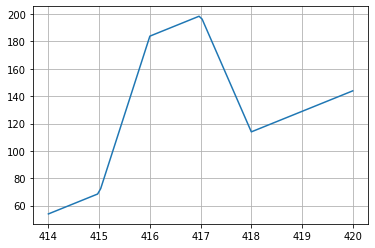

In [2]:
#Example of SPY at 5/6/2022 16:00
# [direction,quantity,strike_price,cost] 
strategy1=[['put',1,415,6.05],['put',-1,416,7.00],['call',-1,417,0.90],['call',1,418,0.71],['stock',15,None,411.34]]
profit_1=[]
close=np.linspace(414,420,100)
for close_price in close:
    profit=option_util.calc_gain_at_expire(close_price,strategy1)
    profit_1.append(profit)
plt.plot(close,profit_1)
plt.grid()

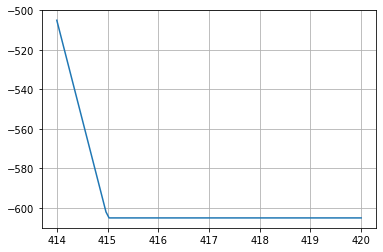

In [3]:
strategy2=[['put',1,415,6.05]]
profit_2=[]
close=np.linspace(414,420,100)
for close_price in close:
    profit=option_util.calc_gain_at_expire(close_price,strategy2)
    profit_2.append(profit)
plt.plot(close,profit_2)
plt.grid()

In [5]:
spy_daily=wb.get_bars(stock='NIO',interval='d1',count=6)
spy_close_price=spy_daily['close'].tolist()
print(spy_close_price)
sigma=option_util.calc_stock_volatility(spy_close_price)
print('volatility = '+str(option_util.calc_stock_volatility(spy_close_price)))

[16.7, 17.5, 17.53, 18.13, 15.38, 14.92]
volatility = 1.346221101049976


In [73]:
risk_free_interest=0
spy_option_chain=wb.get_options(stock='SPY',expireDate='2022-05-13',direction='all')
selected_option_id=[]
for option in spy_option_chain:
    if option['strikePrice'] == '414' :
        #print(option)
        selected_option_id.append(option['call']['tickerId'])
    if option['strikePrice'] == '415' :
        selected_option_id.append(option['put']['tickerId'])
print(selected_option_id)
selected_option=wb.get_option_quote(stock='SPY',optionId=selected_option_id[0])

[1031959593, 1031918505]


{'tickerId': 913243251,
 'name': 'Spdr S&P 500 Etf',
 'symbol': 'SPY',
 'disSymbol': 'SPY',
 'exchangeCode': 'PSE',
 'disExchangeCode': 'NYSEARCA',
 'tickerType': 3,
 'data': [{'open': '6.68',
   'high': '7.88',
   'low': '4.20',
   'strikePrice': '414',
   'preClose': '8.35',
   'openInterest': 1778,
   'volume': '4134',
   'latestPriceVol': '9',
   'delta': '0.4286',
   'vega': '0.2230',
   'impVol': '0.2929',
   'gamma': '0.0235',
   'theta': '-0.4842',
   'rho': '0.0325',
   'close': '4.89',
   'change': '-3.46',
   'changeRatio': '-0.4144',
   'expireDate': '2022-05-13',
   'tickerId': 1031959593,
   'belongTickerId': 913243251,
   'openIntChange': 707,
   'activeLevel': 3,
   'cycle': 2,
   'weekly': 1,
   'executionType': 'A',
   'direction': 'call',
   'derivativeStatus': 0,
   'currency': 'USD',
   'currencyId': 247,
   'regionId': 6,
   'exchangeId': 189,
   'symbol': 'SPY220513C00414000',
   'unSymbol': 'SPY',
   'askList': [{'price': '4.90', 'volume': '64', 'quoteEx': 'ARCO

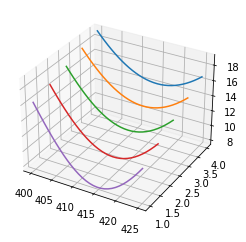

In [101]:
spy_price=np.linspace(400,425,30)
days=np.linspace(4,1,5)
#SPY220513C00414000 + SPY220513P00416000
theo_prices=[]
fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')

for t in days:
    _=[]
    for p in spy_price:
        _.append(option_util.black_scholes(p,416,risk_free_interest,t/365,sigma, 'put')+option_util.black_scholes(p,414,risk_free_interest,t/365,sigma, 'call'))
    lines=ax.plot(spy_price,np.linspace(t,t,30),_)

    #theo_prices.append(_)
    

Text(0.5, 0, 'Strategy theo value')

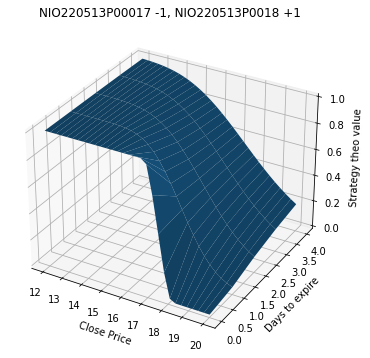

In [32]:
spy_price=np.linspace(12,20,30)
days=np.linspace(4,0.01,5)
risk_free_interest=0
#SPY220513P00416000 +1 SPY220513P00417000 -1 SPY220513C00417000 -1 SPY220513C00418000 +1
theo_prices=[]
fig=plt.figure()
ax = fig.add_subplot(projection='3d')
fig.set_figheight(6)
fig.set_figwidth(8)
for t in days:
    for p in spy_price:
        theo_prices.append(-option_util.black_scholes(p,17,risk_free_interest,t/365,sigma, 'put')+option_util.black_scholes(p,18,risk_free_interest,t/365,sigma, 'put'))
PRICE,DAY=np.meshgrid(spy_price,days)
z=np.array(theo_prices).reshape(PRICE.shape)
ax.plot_surface(PRICE,DAY,z)
ax.set_xlabel('Close Price')
ax.set_ylabel('Days to expire')
ax.set_title('NIO220513P00017 -1, NIO220513P0018 +1')
ax.set_zlabel('Strategy theo value')

In [29]:
value=option_util.black_scholes(14.22,18,risk_free_interest,5/365,sigma, 'call')-option_util.black_scholes(14.22,17,risk_free_interest,5/365,sigma, 'call')
print(value)

-0.08263293526369986


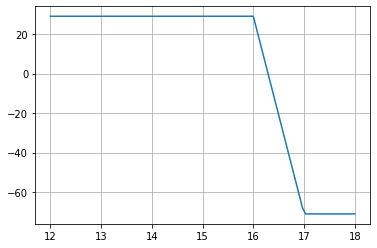

In [20]:
strategy3=[['put',-1,16,1.59],['put',1,17,2.30]]
profit_3=[]
close=np.linspace(12,18,100)
for close_price in close:
    profit=option_util.calc_gain_at_expire(close_price,strategy3)
    profit_3.append(profit)
plt.plot(close,profit_3)
plt.grid()